### Protein analysis FL+FBM+CB - Endo - EXCLUDING CB as well 
#### Mariana Quiroga Londono 

In [2]:
#SETTING ENVIRONMENT 

import rpy2
#import tzlocal
#%load_ext rpy2.ipython

import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, dpi_save=1000)

/usr/local/lib/python3.7/dist-packages/numba/core/cpu.py:77: UserWarning: Numba extension module 'sparse._numba_extension' failed to load due to 'ModuleNotFoundError(No module named 'numba.targets')'.
  numba.core.entrypoints.init_all()


In [3]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

# Read protein data 

Although these protein pools contain donors that are not of our interest, we will filter by 
already demultiplexed mRNA.There is no need to demultiplex here.

In [3]:
path_to ='/home/mq224/rds/rds-bg200-hphi-gottgens/users/mq224/HCA_project/Mapping_results/Results_citeseq'

#### Read Fetal bone marrow

In [4]:
#SIGAF3 counterpart - SIGAD12

adata1 = sc.read_mtx(path_to +'/SIGAD12/umi_count/matrix.mtx.gz')
adata1 = adata1.T
adata1_features = pd.read_csv(path_to + '/SIGAD12/umi_count/features.tsv.gz', sep ="-", header=None)
adata1_barcodes = pd.read_csv(path_to + '/SIGAD12/umi_count/barcodes.tsv.gz', header=None)

adata1.var_names = adata1_features[0]
adata1.obs_names = adata1_barcodes[0]
adata1.obs["Sample"] = "SIGAD12"


print("adata1 shape: "+str(adata1.shape))


#SIGAH3 counterpart - SIGAF12

adata2 = sc.read_mtx(path_to +'/SIGAF12/umi_count/matrix.mtx.gz')
adata2 = adata2.T
adata2_features = pd.read_csv(path_to + '/SIGAF12/umi_count/features.tsv.gz', sep ="-", header=None)
adata2_barcodes = pd.read_csv(path_to + '/SIGAF12/umi_count/barcodes.tsv.gz', header=None)

adata2.var_names = adata2_features[0]
adata2.obs_names = adata2_barcodes[0]
adata2.obs["Sample"] = "SIGAF12"



print("adata2 shape: "+str(adata2.shape))


#SIGAE5 counterpart - SIGAB11

adata3 = sc.read_mtx(path_to +'/SIGAB11/umi_count/matrix.mtx.gz')
adata3 = adata3.T
adata3_features = pd.read_csv(path_to + '/SIGAB11/umi_count/features.tsv.gz', sep ="-", header=None)
adata3_barcodes = pd.read_csv(path_to + '/SIGAB11/umi_count/barcodes.tsv.gz', header=None)

adata3.var_names = adata3_features[0]
adata3.obs_names = adata3_barcodes[0]
adata3.obs["Sample"] = "SIGAB11"


print("adata3 shape: "+str(adata3.shape))


adata1 shape: (25000, 199)
adata2 shape: (25000, 199)
adata3 shape: (13076, 199)


#### Read cord blood

In [5]:
#SIGAG7 CB (also called RPI2)

path_to_raw_CB ='/rds/project/bg200/rds-bg200-hphi-gottgens/users/mq224/project_citeseq/Mphil/CITE-seq/Batch2/CITE-seq-Count_output'

adata4 = sc.read_mtx(path_to_raw_CB +'/SIGAG7_5p_3mistmatches_CITEseqCount_Output/umi_count/matrix.mtx.gz')
adata4 = adata4.T
adata4_features = pd.read_csv(path_to_raw_CB + '/SIGAG7_5p_3mistmatches_CITEseqCount_Output/umi_count/features.tsv.gz', sep ="-", header=None)
adata4_barcodes = pd.read_csv(path_to_raw_CB + '/SIGAG7_5p_3mistmatches_CITEseqCount_Output/umi_count/barcodes.tsv.gz', header=None)

adata4.var_names = adata4_features[0]
adata4.obs_names = adata4_barcodes[0]

adata4.obs["Sample"] = "RPI2"
print("adata4 shape: "+str(adata4.shape))

adata4 shape: (10596, 199)


##### Fetal liver 

In [6]:
#SIGAA6 counterpart is SIGAA10
adata5 = sc.read_mtx(path_to +'/SIGAA10/umi_count/matrix.mtx.gz')
adata5 = adata5.T
adata5_features = pd.read_csv(path_to + '/SIGAA10/umi_count/features.tsv.gz', sep ="-", header=None)
adata5_barcodes = pd.read_csv(path_to + '/SIGAA10/umi_count/barcodes.tsv.gz', header=None)

adata5.var_names = adata5_features[0]
adata5.obs_names = adata5_barcodes[0]
adata5.obs["Sample"] = "SIGAA10"

print("adata5 shape: " + str(adata5.shape))


#SIGAA7 counterpart is SIGAH11
adata6 = sc.read_mtx(path_to +'/SIGAH11/umi_count/matrix.mtx.gz')
adata6 = adata6.T
adata6_features = pd.read_csv(path_to + '/SIGAH11/umi_count/features.tsv.gz', sep ="-", header=None)
adata6_barcodes = pd.read_csv(path_to + '/SIGAH11/umi_count/barcodes.tsv.gz', header=None)

adata6.var_names = adata6_features[0]
adata6.obs_names = adata6_barcodes[0]
adata6.obs["Sample"] = "SIGAH11"

print("adata6 shape: " + str(adata6.shape))


#SIGAC5 counterpart is SIGAH10
adata7 = sc.read_mtx("/home/mq224/rds/rds-bg200-hphi-gottgens/users/rlh60/Data/Lab_members/Niki/10X/SLX19554/Results/Repeats/Citeseq_repeat/SIGAH10/umi_count/matrix.mtx.gz")
adata7 = adata7.T
adata7_features = pd.read_csv("/home/mq224/rds/rds-bg200-hphi-gottgens/users/rlh60/Data/Lab_members/Niki/10X/SLX19554/Results/Repeats/Citeseq_repeat/SIGAH10/umi_count/features.tsv.gz", sep ="-", header=None)
adata7_barcodes = pd.read_csv("/home/mq224/rds/rds-bg200-hphi-gottgens/users/rlh60/Data/Lab_members/Niki/10X/SLX19554/Results/Repeats/Citeseq_repeat/SIGAH10/umi_count/barcodes.tsv.gz", header=None)

adata7.var_names = adata7_features[0]
adata7.obs_names = adata7_barcodes[0]
adata7.obs["Sample"] = "SIGAH10"


print("adata7 shape: "+str(adata7.shape))

adata5 shape: (23736, 199)
adata6 shape: (24999, 199)
adata7 shape: (25000, 199)


In [7]:
#Get rid of unmapped antibodies in each FL sample 

new_ab=[]
for ab in adata1.var_names:
    if ab !="unmapped":
        new_ab.append(ab)
        
adata1=adata1[:,pd.Index(new_ab)].copy()
print("adata1 shape: "+str(adata1.shape))
#the same in the other samples
adata2=adata2[:,pd.Index(new_ab)].copy()
print("adata2 shape: "+str(adata2.shape))
adata3=adata3[:,pd.Index(new_ab)].copy()
print("adata3 shape: "+str(adata3.shape))
adata4=adata4[:,pd.Index(new_ab)].copy()
print("adata4 shape: "+str(adata4.shape))
adata5=adata5[:,pd.Index(new_ab)].copy()
print("adata5 shape: "+str(adata5.shape))
adata6=adata6[:,pd.Index(new_ab)].copy()
print("adata6 shape: "+str(adata6.shape))
adata7=adata7[:,pd.Index(new_ab)].copy()
print("adata7 shape: "+str(adata7.shape))

adata1 shape: (25000, 198)
adata2 shape: (25000, 198)
adata3 shape: (13076, 198)
adata4 shape: (10596, 198)
adata5 shape: (23736, 198)
adata6 shape: (24999, 198)
adata7 shape: (25000, 198)


# Concatenate all the FL +FBM+CB in a single object

In [8]:
list_common_genes_raw = list(set(adata1.var_names) & set(adata2.var_names) & set(adata3.var_names) & set(adata4.var_names) & set(adata5.var_names) & set(adata6.var_names) & set(adata7.var_names))
print(len(list_common_genes_raw))

198


In [9]:
adata = adata1.concatenate(adata2,adata3, adata4, adata5, adata6, adata7)
print(adata)

AnnData object with n_obs × n_vars = 147407 × 198
    obs: 'Sample', 'batch'


In [10]:
#df=pd.DataFrame(adata.X.toarray(),columns=adata.var_names, index= adata.obs_names)
#df.to_csv("preQC_ADTraw_FL-FBM-CB.csv")

In [11]:
adata

AnnData object with n_obs × n_vars = 147407 × 198
    obs: 'Sample', 'batch'

# Import mRNA to filter by its labels and incorporate its assignment and tissue metadata

In [12]:
pwd

'/rds/project/bg200/rds-bg200-hphi-gottgens/users/mq224/project_citeseq/part2citeseq/PhD/Year_1/Collaborations/Haniffa_Lab/Comparison_HSPCs_CD34+_fromFBM_CB_and_FL/ADT'

In [13]:
#Read mRNA that includes all mature populations 
mrna = sc.read("/home/mq224/rds/rds-bg200-hphi-gottgens/users/mq224/project_citeseq/part2citeseq/PhD/Year_1/Collaborations/Haniffa_Lab/Comparison_HSPCs_CD34+_fromFBM_CB_and_FL/mRNA/020221_FL_FBM_CB_FL/h5da_part3/080421_mq224_part3_postHarmony_DEG_matureoldbroadannotations_mRNA_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5.h5ad")

In [14]:
new=[]
for cell in mrna.obs_names:
    cell  = cell.replace('-1-',"-")
    new.append(cell)
mrna.obs_names = pd.Index(new)
common_cells = np.intersect1d(adata.obs_names,mrna.obs_names)
print(len(mrna.obs_names))
print(len(adata.obs_names))
print("Cells in common"+" "+str(len(common_cells)))

12593
147407
Cells in common 11092


In [15]:
adata.obs_names

Index(['GGGTGAATCACCGACG-0', 'AGGCCACTCCCAATAG-0', 'AGGTAGGGTGCATTTG-0',
       'TTAGTCTTCAATGTCG-0', 'TTGGGTATCGGCCAAC-0', 'AGAAGTAGTATTCCGA-0',
       'AGAAGCGGTTGTGTTG-0', 'TCAGCAACAAGTTCGT-0', 'CTTCGGTCAAGCAGGT-0',
       'CTGGTCTCACCCAATA-0',
       ...
       'TATTTCGTCGGAATTC-6', 'AAAGTGACACCGTCGA-6', 'CGAAGTTCATGTCTAG-6',
       'TGTTGGAAGTCAGAGC-6', 'AACCATGTCCTCAGGG-6', 'GGTAGAGGTTCACGAT-6',
       'TAGGAGGAGTCGGCCT-6', 'GGGTCACTCTTGGAAC-6', 'GCGGAAAGTACGGTTT-6',
       'ACTTCGCCAACTGAAA-6'],
      dtype='object', length=147407)

In [16]:
adata = adata[np.unique(common_cells),:].copy()
adata.obs["Tissue"] = mrna.obs["Tissue"]
adata.obs["assignment"] = mrna.obs["assignment"]

In [17]:
np.unique(adata.obs["assignment"])

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
      dtype=object)

In [18]:
np.unique(adata.obs["Tissue"])

array(['CB', 'FBM', 'FL'], dtype=object)

In [19]:
adata_tissue = adata.obs.groupby(["Tissue"]).apply(len)
adata_tissue

Tissue
CB     1948
FBM    1512
FL     7632
dtype: int64

In [20]:
adata_donor = adata.obs.groupby(["assignment"]).apply(len)
adata_donor

assignment
A     490
B    2752
C    1097
D    3293
E    1372
F      31
G     109
H     525
I     441
J     328
K     654
dtype: int64

In [21]:
adata

AnnData object with n_obs × n_vars = 11092 × 198
    obs: 'Sample', 'batch', 'Tissue', 'assignment'

In [22]:
adata_initial = adata.copy()

In [23]:
adata_initial.write("20210419_mq224_initial_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5.h5ad")

... storing 'Sample' as categorical


# QC protein data 

In [24]:
#PREPROCESSING 

normalizing counts per cell
    finished (0:00:00)


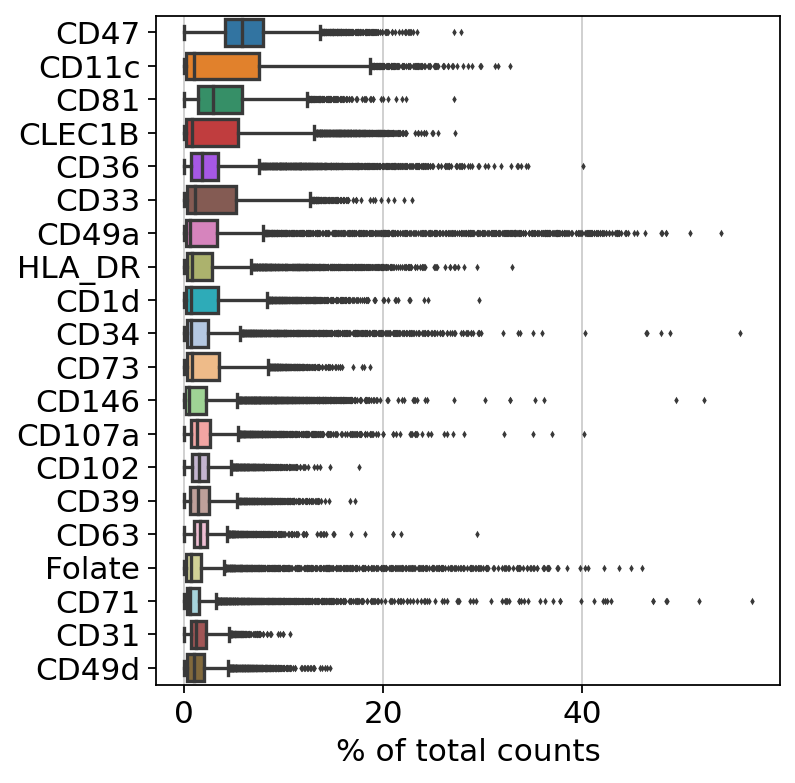

In [25]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [26]:
sc.pp.filter_cells(adata, min_genes=30) #they are not genes, but AB. The code is the same

... storing 'Sample' as categorical


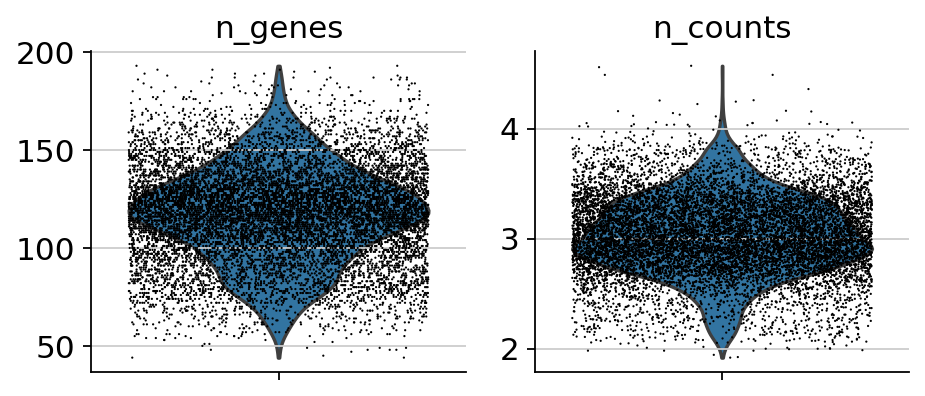

In [27]:
adata.obs['n_counts'] = np.log10(adata.X.sum(axis=1).A1) #they are not genes, but AB. The code is the same
sc.pl.violin(adata, ['n_genes', 'n_counts'],
             jitter=0.4, multi_panel=True)

In [28]:
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

In [29]:
print(np.mean(adata.obs['n_counts']))
print(np.mean(adata.obs['n_genes']))

1502.9323
117.00126217093401


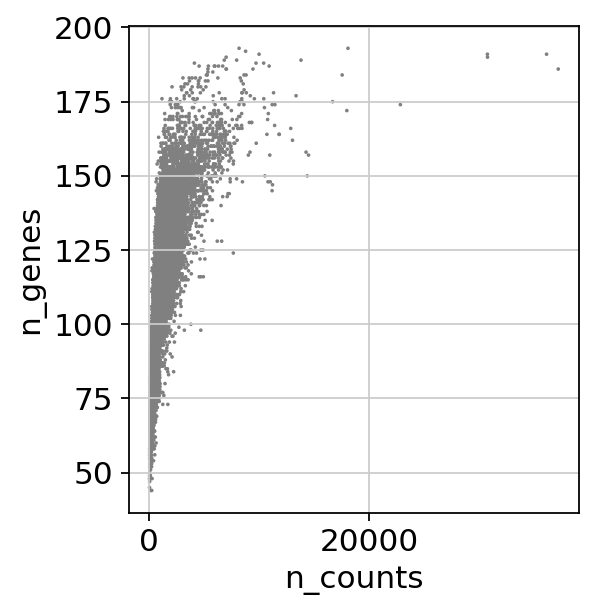

In [30]:
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [31]:
sc.pp.filter_genes(adata, min_cells=3)

In [32]:
adata = adata[adata.obs["n_counts"] < 5000, :]

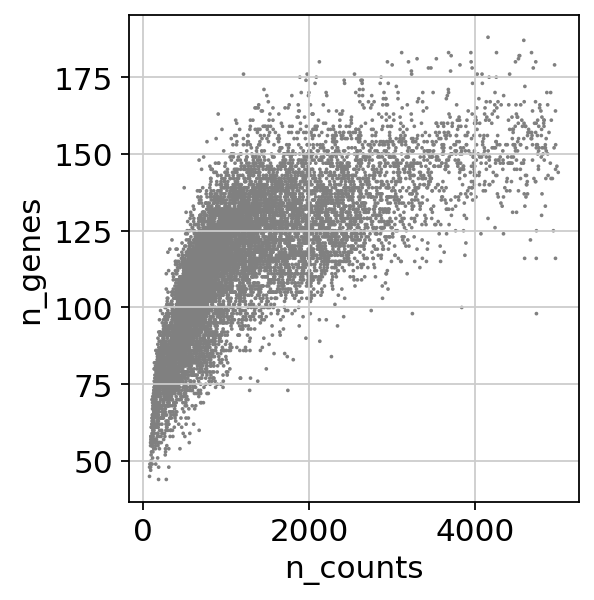

In [33]:
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [34]:
adata

View of AnnData object with n_obs × n_vars = 10741 × 198
    obs: 'Sample', 'batch', 'Tissue', 'assignment', 'n_genes', 'n_counts'
    var: 'n_cells'

#### Filter by mRNA endo cells

In [35]:
mrna_endo = sc.read("/home/mq224/rds/rds-bg200-hphi-gottgens/users/mq224/project_citeseq/part2citeseq/PhD/Year_1/Collaborations/Haniffa_Lab/Comparison_HSPCs_CD34+_fromFBM_CB_and_FL/mRNA/020221_FL_FBM_CB_FL/140421_Label_transfer/140421_mq224_postHarmony_Maturecelltypes-Endo_postLR_mRNA_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5.h5ad")

In [36]:
new=[]
for cell in mrna_endo.obs_names:
    cell  = cell.replace('-1-',"-")
    new.append(cell)
mrna_endo.obs_names = pd.Index(new)
print(mrna_endo.obs_names)

Index(['AAGACAAGTATGCTTG-0', 'AAGCGTTGTTTGCAGT-0', 'ACTGCAACAGCCTACG-0',
       'AGGTCATCATCCGTGG-0', 'CACCGTTTCAGTGTGT-0', 'CATCCGTTCTGTCTCG-0',
       'CCAAGCGGTGGATCAG-0', 'CCACGAGAGGAAGTCC-0', 'CCCGGAACAACTAGAA-0',
       'CCTAAGAGTCTTCAAG-0',
       ...
       'TTGTGTTCACAGCATT-6', 'TTGTTGTAGGCATTTC-6', 'TTGTTTGCACGCGGTT-6',
       'TTTACGTAGTGGCAGT-6', 'TTTACTGCACTTCAGA-6', 'TTTATGCCACGCGTCA-6',
       'TTTCAGTTCTTGGTGA-6', 'TTTCCTCGTCGCTTAA-6', 'TTTGGTTCAGCTACTA-6',
       'TTTGGTTCAGGTTTAC-6'],
      dtype='object', length=3479)


In [37]:
mrna_endo

AnnData object with n_obs × n_vars = 3479 × 24247
    obs: 'lanes', 'mad_prd', 'auto_prd', 'barcode', 'status', 'assignment', 'log_prob_singleton', 'log_prob_doublet', 'cluster0', 'cluster1', 'cluster2', 'Sample', 'Stage', 'Tissue', 'cluster3', 'batch', 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'leiden', 'old.broad_annotations', 'FBM10X_prediction'
    var: 'feature_types', 'gene_ids-0', 'gene_ids-1', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Sample_colors', 'Stage_colors', 'Tissue_colors', 'assignment_colors', 'draw_graph', 'hvg', 'leiden', 'leiden_colors', 'louvain', 'louvain_colors', 'neighbors', 'old.broad_annotations_colors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_draw_graph_fa', 'X_orig_pca', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [38]:
### CB is also excluded ***

In [39]:
mrna_endo = mrna_endo[mrna_endo.obs["FBM10X_prediction"].isin(['sinusoidal EC_ref_train']),:].copy()


In [40]:
mrna_endo = mrna_endo[~mrna_endo.obs["Tissue"].isin(['CB']),:].copy()  #we also exclude CB 
print(mrna_endo.obs["FBM10X_prediction"])
mrna_celltype = mrna.obs.groupby(["Tissue"]).apply(len)
print(mrna_celltype)

AAGACAAGTATGCTTG-0    sinusoidal EC_ref_train
ACTGCAACAGCCTACG-0    sinusoidal EC_ref_train
AGGTCATCATCCGTGG-0    sinusoidal EC_ref_train
CACCGTTTCAGTGTGT-0    sinusoidal EC_ref_train
CATCCGTTCTGTCTCG-0    sinusoidal EC_ref_train
                               ...           
TTGTTTGCACGCGGTT-6    sinusoidal EC_ref_train
TTTACGTAGTGGCAGT-6    sinusoidal EC_ref_train
TTTACTGCACTTCAGA-6    sinusoidal EC_ref_train
TTTGGTTCAGCTACTA-6    sinusoidal EC_ref_train
TTTGGTTCAGGTTTAC-6    sinusoidal EC_ref_train
Name: FBM10X_prediction, Length: 1577, dtype: category
Categories (1, object): [sinusoidal EC_ref_train]
Tissue
CB     2036
FBM    2618
FL     7939
dtype: int64


In [41]:
common_cells = np.intersect1d(adata.obs_names,mrna_endo.obs_names)
print(common_cells)
adata = adata[np.unique(common_cells),:].copy()
print(adata)

['AAACGAAGTGTCCAAT-1' 'AAACGAATCGCCATAA-6' 'AAACGCTAGCCGTAAG-5' ...
 'TTTGGTTCAGGTTTAC-6' 'TTTGGTTTCGACCACG-4' 'TTTGGTTTCTTCTAAC-2']
AnnData object with n_obs × n_vars = 1469 × 198
    obs: 'Sample', 'batch', 'Tissue', 'assignment', 'n_genes', 'n_counts'
    var: 'n_cells'


In [42]:
adata

AnnData object with n_obs × n_vars = 1469 × 198
    obs: 'Sample', 'batch', 'Tissue', 'assignment', 'n_genes', 'n_counts'
    var: 'n_cells'

In [43]:
np.max(adata.X)

1463.0

In [44]:
adata_qc=adata.copy()

In [45]:
adata_qc.write("20210419_mq224_postQC_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5.h5ad")

In [46]:
adata_qc

AnnData object with n_obs × n_vars = 1469 × 198
    obs: 'Sample', 'batch', 'Tissue', 'assignment', 'n_genes', 'n_counts'
    var: 'n_cells'

In [47]:
adata_qc_tissue = adata_qc.obs.groupby(["Tissue"]).apply(len)
adata_qc_tissue

Tissue
FBM     248
FL     1221
dtype: int64

In [48]:
adata_qc_donor = adata_qc.obs.groupby(["assignment"]).apply(len)
adata_qc_donor

assignment
A    195
B    500
C    222
D    304
E    185
F     17
G     46
dtype: int64

In [49]:
adata_qc_sample = adata_qc.obs.groupby(["Sample"]).apply(len)
adata_qc_sample

Sample
SIGAA10    486
SIGAB11    185
SIGAD12     17
SIGAF12     46
SIGAH10    195
SIGAH11    540
dtype: int64

In [50]:
import numpy as np
from sklearn.mixture import GaussianMixture
import anndata

cell_protein_matrix = adata_qc.copy()

### DSB METHOD - CLUSTERING AND VISUALIZATION

In [51]:
###########TEST: CAN WE GET RID OF THE BACKGROUND NOISE IN OUR PROTEIN DATA? DSB!

#SIGAD12_initial as the SUPER RAW

cell_protein_matrix = adata_initial[adata_qc.obs_names,:].copy()

#SIGAD12.shape
cell_protein_matrix.shape

(1469, 198)

In [52]:
# adata here must be the read in from raw umi matrix
#We need to define empty droplets. 
#You split out the data. You assign how many cells as empty droplets 
def getNegDroplets(adata, lamda=5): 
    #lamnda controls how many empty droplets you will have in the end.
    #Its very hard to tell which is the numner of empty droplets.
    umi = np.log1p(np.sum(adata.X.toarray(), axis=1)) #umis per cell
    mu_umi = np.mean(umi) #mean of umi counts
    sd_umi = np.std(umi) #SD of the umi counts 
    print(mu_umi)
    print(sd_umi)
    sub_threshold = mu_umi-(lamda*sd_umi) 
    print(sub_threshold)
    plt.hist(umi, bins = 100)
    plt.axvline(x=sub_threshold,color='red')
    #Simplified version. They used Seurat function,  but we dont want that.
    #anything less than that would be empty droplets.
    return adata[umi<sub_threshold,:].copy()
    #any cell that has umi counts < threshold. 

6.9775786
0.81982666
6.157751977443695
(1549, 198)


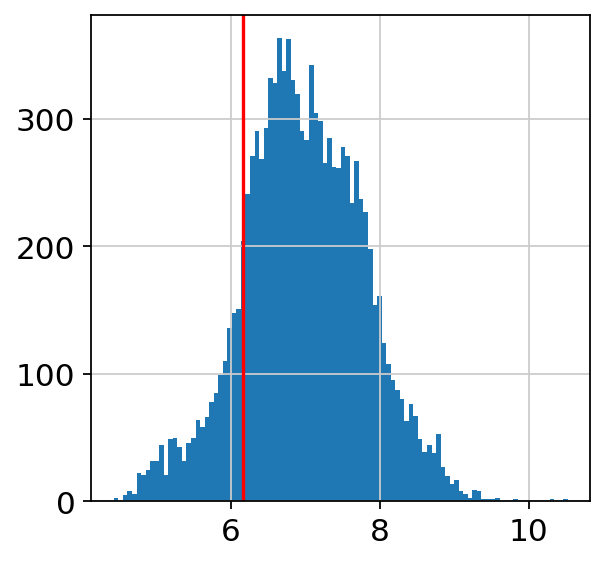

In [53]:
import matplotlib.pyplot as plt

empty_drop_matrix = getNegDroplets(adata_initial, lamda=1)
print(empty_drop_matrix.shape)

In [54]:
#renormalisation of the counts by empty droplets background.
#cell_protein_matrix and empty_drop_matrix are split from the same matrix,
#only difference is cells, but Ab is the same.
#cell_protein_matrix: adata object.
def DSB(cell_protein_matrix, empty_drop_matrix, pseudocount=10):
    adt = cell_protein_matrix.X.toarray() #meaningful cells xantibodies
    adtu = empty_drop_matrix.X.toarray() #the non meaninful - empty droplets 
    adt_log = np.log(adt+pseudocount) 
    adtu_log = np.log(adtu+pseudocount)
    mu_u = np.mean(adtu_log, axis=0) #for each protein in empty drop.
    sd_u = np.std(adtu_log, axis=0) #for each protein in empty drop.
    norm_adt = (adt_log-mu_u)/sd_u  #Y=log(Xi+P)-mu / sd
    adata_new = anndata.AnnData(X=norm_adt, obs=cell_protein_matrix.obs, var=cell_protein_matrix.var)
    #new normalised values
    print(adata_new.shape)
    cellwise_background_mean = np.array([]) #equation 2 from this line.
    for column in norm_adt.T:
        gmm = GaussianMixture(n_components=2) #for each protein
        gmm.fit(column.reshape(-1,1)) #you fit it
        cellwise_background_mean= np.append(cellwise_background_mean,gmm.means_[0])
        #you get the mean for the background
    print(len(cellwise_background_mean))
    adata_new.var['bg_mean'] = cellwise_background_mean #contains all the new normalised umi counts.
    #save it for the regression function, which we wont use!
    return adata_new

In [55]:
adata_new = DSB(cell_protein_matrix, empty_drop_matrix, pseudocount = 5)
cell_protein_matrix.shape

(1469, 198)
198


(1469, 198)

In [56]:
#empty_drop_matrix = getNegDroplets(adata)
#adata_new = DSB(cell_protein_matrix, empty_drop_matrix)
#sc.pp.regress_out(adata_new, keys=['bg_mean'])

adata_new.raw = adata_new

adata_new1=adata_new.copy().T

#for each protein you regress out the effect of the background noise.
####sc.pp.regress_out(adata_new1, keys=['bg_mean'])

adata_new2 = adata_new1.T

adata_new2.raw = adata_new

DSB_output0 = adata_new2.copy()

In [57]:
DSB_output0

AnnData object with n_obs × n_vars = 1469 × 198
    obs: 'Sample', 'batch', 'Tissue', 'assignment'
    var: 'bg_mean'

In [58]:
DSB_output0.raw = DSB_output0

In [59]:
DSB_output0.write("20210419_mq224_postQC_postDSB_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5.h5ad")

In [60]:
sc.tl.pca(DSB_output0, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:00)


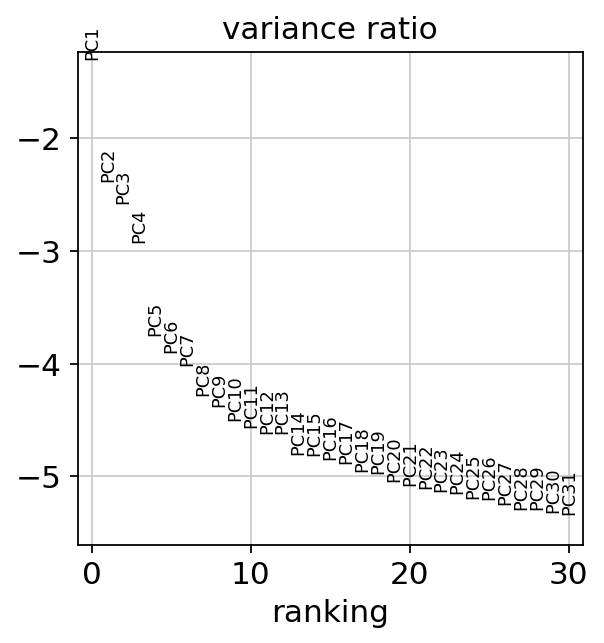

In [61]:
sc.pl.pca_variance_ratio(DSB_output0, log=True)

In [62]:
sc.pp.neighbors(DSB_output0, n_neighbors=10, n_pcs=30)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [63]:
sc.tl.umap(DSB_output0)
sc.tl.draw_graph(DSB_output0)
sc.tl.leiden(DSB_output0, resolution=0.5)
sc.tl.louvain(DSB_output0, resolution=0.5)

computing UMAP


/usr/local/lib/python3.7/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:06)
running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 8 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


In [64]:
DSB_output0.write("20210419_mq224_postQC_postDSB_postFDG_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5.h5ad")

In [65]:
DSB_output0 

AnnData object with n_obs × n_vars = 1469 × 198
    obs: 'Sample', 'batch', 'Tissue', 'assignment', 'leiden', 'louvain'
    var: 'bg_mean'
    uns: 'pca', 'neighbors', 'umap', 'draw_graph', 'leiden', 'louvain'
    obsm: 'X_pca', 'X_umap', 'X_draw_graph_fa'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

# Harmony correction

In [68]:
#harmony prep - save pca and batch (sample) metadata columns 
pca = DSB_output0.obsm['X_pca']
batch = DSB_output0.obs['assignment']

In [69]:
np.savetxt('20210419_mq224_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5_pca_harmony_F.csv', pca, delimiter=',')
pd.Series.to_csv(batch, '20210419_mq224_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5_batch_harmony_F.txt',header=False)

In [70]:
pwd

'/rds/project/bg200/rds-bg200-hphi-gottgens/users/mq224/project_citeseq/part2citeseq/PhD/Year_1/Collaborations/Haniffa_Lab/Comparison_HSPCs_CD34+_fromFBM_CB_and_FL/ADT'

#######R code
#READ IN THE BATCH
batch <- read.table("CB_CD34_batch_harmony.txt", header = FALSE, sep = ",", dec = ".") rownames(batch) <- batch$V1 batch <- batch[-grep('V1', colnames(batch))] head(batch)
#READ IN THE PCA array
#pca <- read.matrix("CB_CD34_pca_harmony.csv", header = FALSE, sep = "", skip = 0)
#pca <- as.matrix(read.table(file="CB_CD34_pca_harmony.csv", header=FALSE, sep=""))
pca< - read.csv(file = "CB_CD34_pca_harmony.csv") head(pca) dim(pca)
#HARMONY
library(harmony) library(magrittr)
hem = HarmonyMatrix(pca, batch$V2, theta=3, verbose=TRUE, do_pca=FALSE) hem = data.frame(hem) write.csv(hem, "CB_CD34_hem_output.csv", row.names = F, quote = F)
######Rcode

In [71]:
hem = pd.read_csv("20210419_mq224_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5_hem_output_.csv")

In [72]:
# save old pca values or orig.pca and save batch corrected pca results in anndata object as x_pca
DSB_output0.obsm['X_orig_pca'] = DSB_output0.obsm['X_pca']
DSB_output0.obsm['X_pca'] = hem.values

### Add dimensional reduction post harmony

In [73]:
# run snn neighbourhood graph
sc.pp.neighbors(DSB_output0, n_neighbors=10, n_pcs=30)
sc.tl.leiden(DSB_output0, resolution = 0.3)
sc.tl.louvain(DSB_output0, resolution =0.3)
# run umap
sc.tl.umap(DSB_output0)
# run fdg 
sc.tl.draw_graph(DSB_output0, init_pos='X_pca', layout='fa')

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 7 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP


/usr/local/lib/python3.7/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:05)


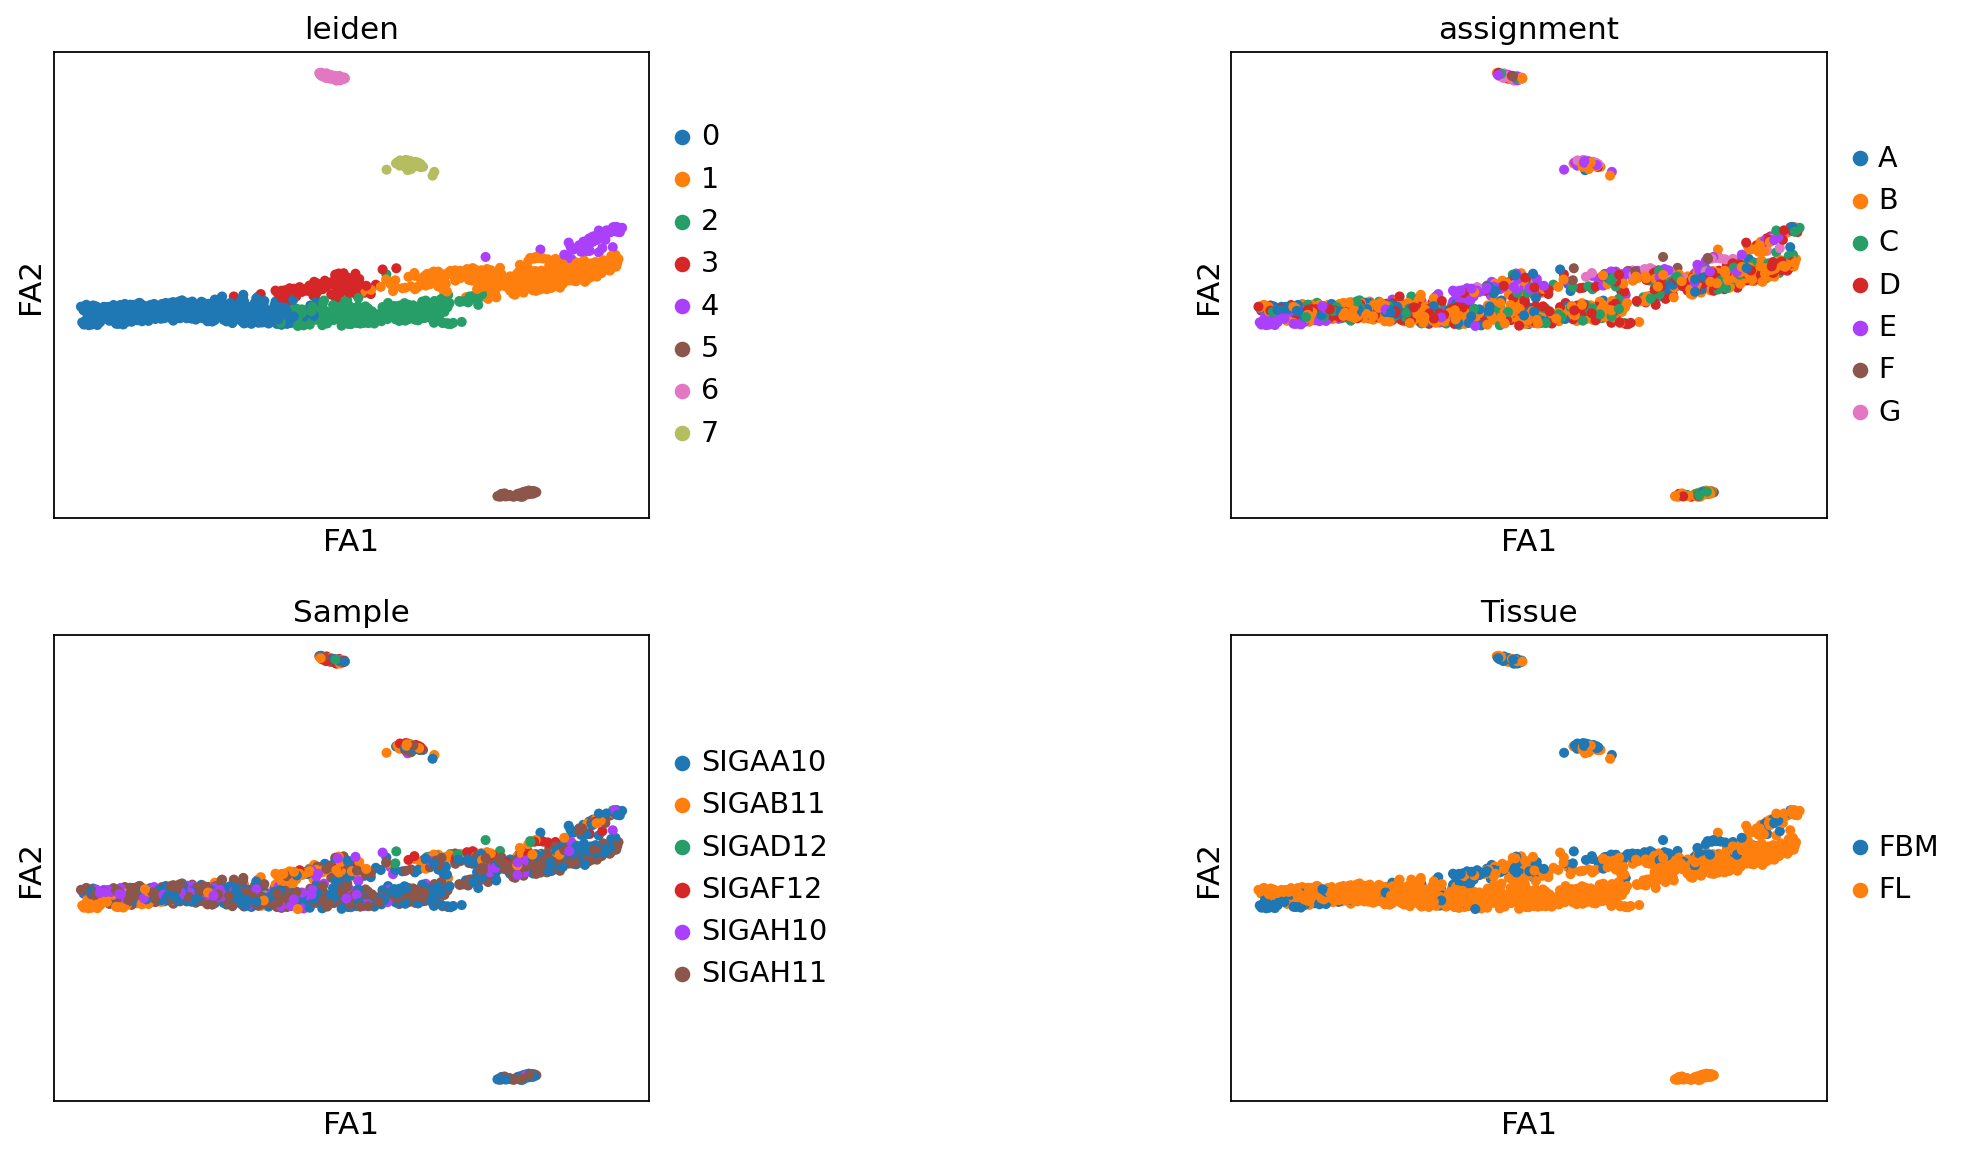

In [74]:
sc.pl.draw_graph(DSB_output0, color=['leiden','assignment','Sample','Tissue'], ncols=2, wspace = 0.8, cmap=cmap)

In [ ]:
#DSB_output0.write("20210419_mq224_postQC_postDSB_postFDG_postHarmony_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5.h5ad")

In [75]:
DSB_output0 = sc.read("20210419_mq224_postQC_postDSB_postFDG_postHarmony_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5.h5ad")

### Using mRNA AND FDG coordinates for downstream analysis

In [76]:
mrna_adata = mrna_endo.copy()

In [77]:
mrna_adata

AnnData object with n_obs × n_vars = 1577 × 24247
    obs: 'lanes', 'mad_prd', 'auto_prd', 'barcode', 'status', 'assignment', 'log_prob_singleton', 'log_prob_doublet', 'cluster0', 'cluster1', 'cluster2', 'Sample', 'Stage', 'Tissue', 'cluster3', 'batch', 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'leiden', 'old.broad_annotations', 'FBM10X_prediction'
    var: 'feature_types', 'gene_ids-0', 'gene_ids-1', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Sample_colors', 'Stage_colors', 'Tissue_colors', 'assignment_colors', 'draw_graph', 'hvg', 'leiden', 'leiden_colors', 'louvain', 'louvain_colors', 'neighbors', 'old.broad_annotations_colors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_draw_graph_fa', 'X_orig_pca', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [78]:
#READ FDG
FDG_co = pd.DataFrame(mrna_adata.obsm["X_draw_graph_fa"], index= mrna_adata.obs_names)

#READ CLUSTERS
leiden_cl = pd.DataFrame(mrna_adata.obs['FBM10X_prediction'], index=mrna_adata.obs_names)

In [79]:
FDG_co.index == leiden_cl.index

array([ True,  True,  True, ...,  True,  True,  True])

In [80]:
#Do the same with the leiden clusters
intersect_cl_ix =  np.intersect1d(leiden_cl.index,DSB_output0.obs.index)
print(len(intersect_cl_ix))
leiden_cl = leiden_cl.loc[intersect_cl_ix]
FDG_co = FDG_co.loc[intersect_cl_ix]
print(leiden_cl.shape)

1469
(1469, 1)


In [81]:
DSB_output0.obs.index

Index(['AAACGAAGTGTCCAAT-1', 'AAACGAATCGCCATAA-6', 'AAACGCTAGCCGTAAG-5',
       'AAAGAACGTCTCAGAT-5', 'AAAGGATTCGCCGTGA-4', 'AAAGGGCGTGTATACC-2',
       'AAAGGTAAGTGGATTA-4', 'AAAGGTAGTTTGTTCT-2', 'AAAGTCCGTGACAGGT-6',
       'AAAGTGACATCATGAC-4',
       ...
       'TTTGATCGTCGGAAAC-5', 'TTTGATCTCCGATCGG-2', 'TTTGATCTCTGCAGCG-4',
       'TTTGGAGGTACCTAGT-4', 'TTTGGAGTCGAGAGAC-1', 'TTTGGAGTCGAGGCAA-4',
       'TTTGGTTCAGCTACTA-6', 'TTTGGTTCAGGTTTAC-6', 'TTTGGTTTCGACCACG-4',
       'TTTGGTTTCTTCTAAC-2'],
      dtype='object', length=1469)

In [82]:
leiden_cl

,FBM10X_prediction
AAACGAAGTGTCCAAT-1,sinusoidal EC_ref_train
AAACGAATCGCCATAA-6,sinusoidal EC_ref_train
AAACGCTAGCCGTAAG-5,sinusoidal EC_ref_train
AAAGAACGTCTCAGAT-5,sinusoidal EC_ref_train
AAAGGATTCGCCGTGA-4,sinusoidal EC_ref_train
...,...
TTTGGAGTCGAGGCAA-4,sinusoidal EC_ref_train
TTTGGTTCAGCTACTA-6,sinusoidal EC_ref_train
TTTGGTTCAGGTTTAC-6,sinusoidal EC_ref_train
TTTGGTTTCGACCACG-4,sinusoidal EC_ref_train


In [83]:
#Substituting ab clusters for mRNA clusters!
DSB_output0.obs['FBM10X_prediction'] = leiden_cl.astype(str)

In [84]:
DSB_output0.obs['FBM10X_prediction']

AAACGAAGTGTCCAAT-1    sinusoidal EC_ref_train
AAACGAATCGCCATAA-6    sinusoidal EC_ref_train
AAACGCTAGCCGTAAG-5    sinusoidal EC_ref_train
AAAGAACGTCTCAGAT-5    sinusoidal EC_ref_train
AAAGGATTCGCCGTGA-4    sinusoidal EC_ref_train
                               ...           
TTTGGAGTCGAGGCAA-4    sinusoidal EC_ref_train
TTTGGTTCAGCTACTA-6    sinusoidal EC_ref_train
TTTGGTTCAGGTTTAC-6    sinusoidal EC_ref_train
TTTGGTTTCGACCACG-4    sinusoidal EC_ref_train
TTTGGTTTCTTCTAAC-2    sinusoidal EC_ref_train
Name: FBM10X_prediction, Length: 1469, dtype: object

In [85]:
#This is for the second experiment APPLYING DSB
DSB_output0.obsm['X_draw_graph_fa'] = FDG_co[[0,1]].values

In [86]:
DSB_output0

AnnData object with n_obs × n_vars = 1469 × 198
    obs: 'Sample', 'batch', 'Tissue', 'assignment', 'leiden', 'louvain', 'FBM10X_prediction'
    var: 'bg_mean'
    uns: 'pca', 'neighbors', 'umap', 'draw_graph', 'leiden', 'louvain', 'leiden_colors', 'assignment_colors', 'Sample_colors', 'Tissue_colors'
    obsm: 'X_pca', 'X_umap', 'X_draw_graph_fa', 'X_orig_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

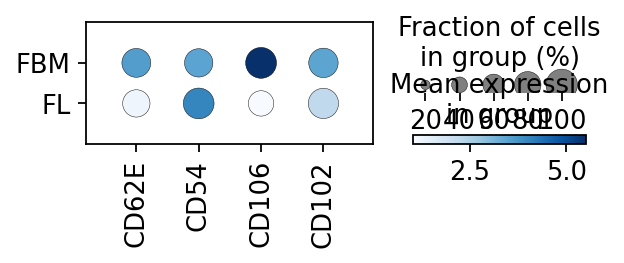

In [99]:
sc.pl.dotplot(DSB_output0, var_names=markers,  
              groupby="Tissue", cmap='Blues',figsize=(4,1), vmax=5.5, save = "20210419_mq224_ADT_postQC_postDSB_postHarmony_SinuEC-endo_FBM-FL.pdf")